<img src = "./resources/images/banner_4.jpeg" alt = "Encabezado MLDS" width = "100%">  </img>

# **Modelamiento y Validación**
---

## **0. Integrantes del equipo de trabajo**
---

<table><thead>
  <tr>
    <th>#</th>
    <th>Integrante</th>
    <th>Documento de identidad</th>
  </tr></thead>
<tbody>
  <tr>
    <td>1</td>
    <td>Diego Alejandro Feliciano Ramos</td>
    <td>1024586904</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Ivonne Cristina Ruiz Páez</td>
    <td>1014302058</td>
  </tr>
</tbody>
</table>

In [ ]:
#Carga de datos
!pip install medmnist
!pip install ydata-profiling

In [1]:
from medmnist import PneumoniaMNIST
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_set = PneumoniaMNIST(split="train", download=True)
val_set = PneumoniaMNIST(split="val", download=True)
test_set = PneumoniaMNIST(split="test", download=True)

Using downloaded and verified file: /Users/diegof/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /Users/diegof/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /Users/diegof/.medmnist/pneumoniamnist.npz


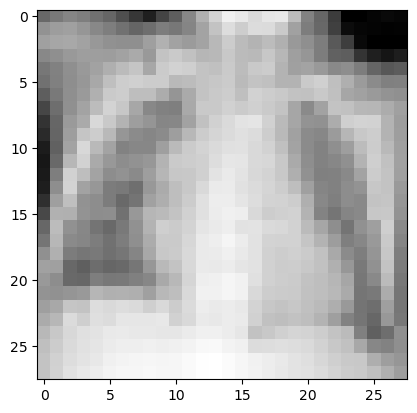

In [3]:
plt.imshow(train_set.imgs[0], cmap = 'gray')

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from medmnist import PneumoniaMNIST

# Función para aplicar umbralización (De la anterior entrega)
def umbralizacion(imagen):
    _, img_umbralizada = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)
    return img_umbralizada

# Función para aplicar equalización del histograma
def igualacion_histograma(imagen):
    img_eq = cv2.equalizeHist(imagen)
    return img_eq

# Procesar el conjunto de datos
def procesar_imagenes(dataset):
    imagenes_procesadas = []
    imagenes_originales = []

    for img, _ in dataset:
        img = np.array(img)
        img = img.squeeze()
        img = (img * 255).astype(np.uint8)

        # Almacenar la imagen original
        imagenes_originales.append(img)

        # Aplicar umbralización
        img_umbralizada = umbralizacion(img)

        # Aplicar equalización del histograma
        img_eq = igualacion_histograma(img)

        # Almacenar las imágenes procesadas
        imagenes_procesadas.append((img_umbralizada, img_eq))

    return imagenes_originales, imagenes_procesadas

# Procesar las imágenes del conjunto de entrenamiento
imagenes_originales_train, imagenes_procesadas_train = procesar_imagenes(train_set)

# Mostrar algunas imágenes originales, umbralizadas y ecualizadas
plt.figure(figsize=(15, 10))
for i in range(5):
    # Imagen original
    plt.subplot(3, 5, i + 1)
    plt.imshow(imagenes_originales_train[i], cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Imagen umbralizada
    plt.subplot(3, 5, i + 6)
    plt.imshow(imagenes_procesadas_train[i][0], cmap='gray')
    plt.title('Umbralizada')
    plt.axis('off')

    # Imagen ecualizada
    plt.subplot(3, 5, i + 11)
    plt.imshow(imagenes_procesadas_train[i][1], cmap='gray')
    plt.title('Ecualizada')
    plt.axis('off')

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'cv2'

In [4]:
train_imgs = train_set.imgs
train_imgs = train_imgs.reshape(len(train_imgs), 28*28)
train_imgs = pd.DataFrame(train_imgs)
#train_imgs['y'] = train_set.labels

val_imgs = val_set.imgs
val_imgs = val_imgs.reshape(len(val_imgs), 28*28)
val_imgs = pd.DataFrame(val_imgs)
#val_imgs['y'] = val_set.labels

main_train_imgs = pd.concat((train_imgs, val_imgs))
main_train_labels = train_set.labels.flatten().tolist() + val_set.labels.flatten().tolist()
main_train_labels = np.array(main_train_labels)

test_imgs = test_set.imgs
test_imgs = test_imgs.reshape(len(test_imgs), 28*28)
test_imgs = pd.DataFrame(test_imgs)
#test_imgs['y'] = test_set.labels

main_train_imgs

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,92,108,117,111,101,90,70,49,28,60,...,204,201,198,193,186,180,177,168,154,139
1,115,118,117,113,114,120,123,123,132,146,...,201,203,204,202,198,197,188,183,176,169
2,149,146,147,133,88,50,70,117,146,151,...,220,218,216,212,206,202,190,188,169,157
3,110,100,101,117,126,115,98,88,80,98,...,144,136,132,134,134,132,139,138,137,136
4,115,118,126,141,158,171,177,179,173,173,...,196,198,198,195,193,190,177,173,168,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,129,155,162,150,146,149,154,162,181,198,...,195,201,193,182,173,160,163,162,145,130
520,123,124,134,147,148,145,154,170,169,172,...,191,193,199,201,199,196,195,192,189,190
521,126,145,154,158,169,178,188,203,194,199,...,205,204,203,200,195,192,183,181,175,168
522,3,0,3,5,0,1,46,98,131,165,...,202,198,189,175,162,156,147,158,162,152


## **1. Selección y diseño de modelos**
---

Seleccione el/los modelo/s a explorar para aplicar sobre el conjunto de datos. Recuerde que la selección del modelo está influenciada por diferentes factores.

Además, debe definir cuál es su problema:

- **Regresión**: se busca estimar un valor continúo a partir de los datos.
- **Clasificación**: permite estimar un valor categórico a partir de los datos.
- **Agrupamiento**: permite encontrar grupos de datos similares.
- **Otros modelos**: recuerde que dispone de otros tipos de tareas supervisadas y no supervisadas.

Justifique la selección y el diseño de los modelos a explorar.

**Repuesta 1:** La naturaleza del problema exige el uso de modelos de clasificación, pues la variable objetivo es categórica (binaria). Por lo tanto, se explorará el uso de un perceptron multicapa (MLP) junto a una perdida de entropía cruzada, que permita incluir relaciones NO lineales. Adicionalmente, se ajustarán los hiperparámetros correspondientes a su arquitectura (número de neuronas en la capa intermedia), taza de aprendizaje y regularización.

**Repuesta 2:** Dada la falta de una variable objetivo se utilizará un algoritmo de agrupamiento, sien embargo, debido a la alta dimensionalidad de los datos, este será acompañado de un modelo de reducción de dimensionalidad. Por lo tanto, se explorará el uso de un perceptron multicapa (MLP) junto a una perdida de error cuadrático medio para construir un Autocoder que permita obtener una representación reducida de los datos, finalmente sobre dicha representación se aplicara K-means.

Respecto a los hiperparamentros, se tendrá en cuenta la arquitectura (número de neuronas en la capa intermedia), taza de aprendizaje y regularización para el primer modelo. Para el segundo únicamente se identificará el número de clusters.




## **2. Entrenamiento del Modelo y Selección de Hiperparámetros**
---

Entrene el modelo y consiga la combinación eficiente de hiperparámetros para obtener un rendimiento óptimo.

Es importante visualizar los resultados de manera clara y comprensible. Para esto, **se deben utilizar tablas y gráficos** que muestren cómo cambian las métricas de desempeño del proceso de entrenamiento en función de los hiperparámetros probados. Algunas herramientas visuales útiles incluyen las *curvas de aprendizaje* y las *curvas de validación,* que nos permiten comparar el rendimiento del modelo con diferentes ajustes de hiperparámetros.

### Respuesta 1:

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'hidden_layer_sizes':[(64,),(128,),(256,)], 'learning_rate_init':[1e-3, 1e-4], 'alpha':[1e-4,1e-3,1e-2], 'batch_size':[128,256]}
nn = MLPClassifier(random_state=1996, activation='relu', solver='adam', early_stopping=True)
supervised_grid = GridSearchCV(nn, parameters, verbose=3)

supervised_grid.fit(main_train_imgs, main_train_labels)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END alpha=0.0001, batch_size=128, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.940 total time=   1.3s
[CV 2/5] END alpha=0.0001, batch_size=128, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.944 total time=   1.1s
[CV 3/5] END alpha=0.0001, batch_size=128, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.942 total time=   1.5s
[CV 4/5] END alpha=0.0001, batch_size=128, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.917 total time=   0.6s
[CV 5/5] END alpha=0.0001, batch_size=128, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.937 total time=   2.7s
[CV 1/5] END alpha=0.0001, batch_size=128, hidden_layer_sizes=(64,), learning_rate_init=0.0001;, score=0.926 total time=   3.7s
[CV 2/5] END alpha=0.0001, batch_size=128, hidden_layer_sizes=(64,), learning_rate_init=0.0001;, score=0.947 total time=   2.0s
[CV 3/5] END alpha=0.0001, batch_size=128, hidd

GridSearchCV(estimator=MLPClassifier(early_stopping=True, random_state=1996),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'batch_size': [128, 256],
                         'hidden_layer_sizes': [(64,), (128,), (256,)],
                         'learning_rate_init': [0.001, 0.0001]},
             verbose=3)

In [6]:
best_classification_model = supervised_grid.best_estimator_

cv_results = pd.DataFrame(supervised_grid.cv_results_)
cv_results = cv_results.sort_values(by=['rank_test_score'])
cv_results[['rank_test_score', 'param_hidden_layer_sizes', 'param_learning_rate_init', 'param_alpha', 'param_batch_size', 'mean_test_score']]

,rank_test_score,param_hidden_layer_sizes,param_learning_rate_init,param_alpha,param_batch_size,mean_test_score
4,1,"(256,)",0.001,0.0001,128,0.951070
16,2,"(256,)",0.001,0.001,128,0.947629
34,3,"(256,)",0.001,0.01,256,0.947439
28,4,"(256,)",0.001,0.01,128,0.946293
24,5,"(64,)",0.001,0.01,128,0.945146
26,6,"(128,)",0.001,0.01,128,0.944189
30,7,"(64,)",0.001,0.01,256,0.943424
14,8,"(128,)",0.001,0.001,128,0.943235
10,9,"(256,)",0.001,0.0001,256,0.941704
22,10,"(256,)",0.001,0.001,256,0.941324


### Respuesta 2:

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

parameters = {'hidden_layer_sizes':[(64,),(128,)], 'learning_rate_init':[1e-3, 1e-4], 'alpha':[1e-3,1e-2]}
nn = MLPRegressor(random_state=1996, activation='relu', solver='adam', early_stopping=True, batch_size = 128, max_iter=500)
non_supervised_grid = GridSearchCV(nn, parameters, cv=3, verbose=3)

non_supervised_grid.fit(main_train_imgs, main_train_imgs)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.862 total time=  24.6s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.836 total time=  16.2s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.840 total time=  13.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.0001;, score=0.864 total time=  38.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.0001;, score=0.862 total time=  37.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.0001;, score=0.865 total time=  37.1s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.001;, score=0.911 total time=  36.3s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.001;, score=0.916 total time=  35.5s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.001;, score=0.909 total time=  31.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.0001;, score=0.901 total time=  56.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.0001;, score=0.902 total time= 1.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.0001;, score=0.903 total time= 1.0min
[CV 1/3] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.861 total time=  17.2s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.849 total time=  19.5s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.001;, score=0.846 total time=  14.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.0001;, score=0.861 total time=  41.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.0001;, score=0.862 total time=  45.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.0001;, score=0.866 total time=  41.1s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=(128,), learning_rate_init=0.001;, score=0.912 total time=  36.7s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=(128,), learning_rate_init=0.001;, score=0.896 total time=  19.3s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=(128,), learning_rate_init=0.001;, score=0.909 total time=  28.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=(128,), learning_rate_init=0.0001;, score=0.902 total time= 1.0min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=(128,), learning_rate_init=0.0001;, score=0.904 total time= 1.0min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=(128,), learning_rate_init=0.0001;, score=0.904 total time= 1.1min


GridSearchCV(cv=3,
             estimator=MLPRegressor(batch_size=128, early_stopping=True,
                                    max_iter=500, random_state=1996),
             param_grid={'alpha': [0.001, 0.01],
                         'hidden_layer_sizes': [(64,), (128,)],
                         'learning_rate_init': [0.001, 0.0001]},
             verbose=3)

In [8]:
best_autoencoder = non_supervised_grid.best_estimator_

cv_results = pd.DataFrame(non_supervised_grid.cv_results_)
cv_results = cv_results.sort_values(by=['rank_test_score'])
cv_results[['rank_test_score', 'param_hidden_layer_sizes', 'param_learning_rate_init', 'param_alpha', 'mean_test_score']]

,rank_test_score,param_hidden_layer_sizes,param_learning_rate_init,param_alpha,mean_test_score
2,1,"(128,)",0.001,0.001,0.911751
6,2,"(128,)",0.001,0.01,0.905572
7,3,"(128,)",0.0001,0.01,0.903261
3,4,"(128,)",0.0001,0.001,0.901951
1,5,"(64,)",0.0001,0.001,0.863403
5,6,"(64,)",0.0001,0.01,0.862864
4,7,"(64,)",0.001,0.01,0.851848
0,8,"(64,)",0.001,0.001,0.846259


In [9]:
interpects = best_autoencoder.intercepts_[0]
coefs = best_autoencoder.coefs_[0]
activation = lambda x: np.clip(x, a_min=0, a_max=None)

representation = activation((main_train_imgs.values@coefs) + interpects)


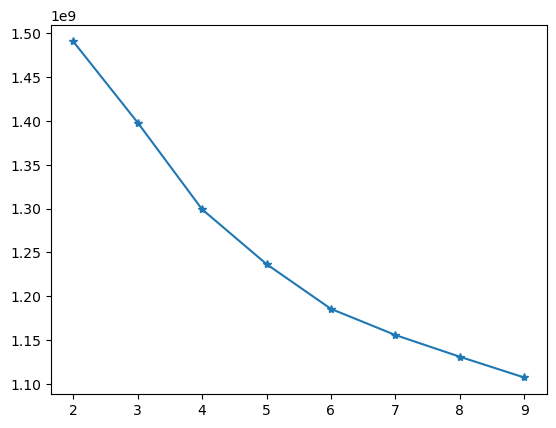

In [10]:
from sklearn.cluster import KMeans

inertia = []
for i in range (2,10):
  model_clustering = KMeans(n_clusters=i, random_state=1996, n_init="auto").fit(representation)
  inertia.append(model_clustering.inertia_)

plt.plot(list(range (2,10)), inertia, '*-')
plt.show()

best_clustering = KMeans(n_clusters=3, random_state=1996, n_init="auto").fit(representation)

## **3. Evaluación del modelo**
---

En esta sección debe reportar el desempeño del modelo sobre la partición de datos de pruebas (test). Considere que dispone de las siguientes métricas:

- **Clasificación**: accuracy, precision, recall, f1-score, AUC, matriz de confusión, etc.
- **Regresión**: $r^2$, error cuadrático medio, error absoluto medio, etc.
- **Agrupamiento**: coeficiente de silueta, índice de Davies-Bouldin, etc.

Los resultados se deben presentar usando tablas y figuras además del análisis detallado respectivo.

### Respuesta 1:

In [11]:
from sklearn.metrics import classification_report

y_ = best_classification_model.predict(test_imgs)
y_test = test_set.labels.flatten()

print(classification_report(y_test, y_))

              precision    recall  f1-score   support

           0       0.97      0.49      0.65       234
           1       0.76      0.99      0.86       390

    accuracy                           0.80       624
   macro avg       0.87      0.74      0.76       624
weighted avg       0.84      0.80      0.78       624



### Respuesta 2:

In [12]:
representation_test = activation((test_imgs.values@coefs) + interpects)
groups = best_clustering.predict(representation_test)

pd.crosstab(y_test, groups)

col_0,0,1,2
row_0,,,
0,33,78,123
1,151,59,180


Adicionalmente, si utilizó un modelo pre-entrenado, debe generar predicciones y mostrar el resultado final de la aplicación del modelo sobre sus datos:

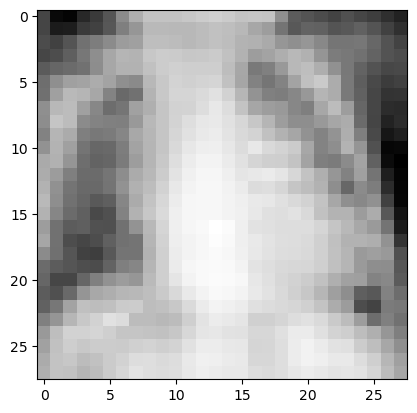

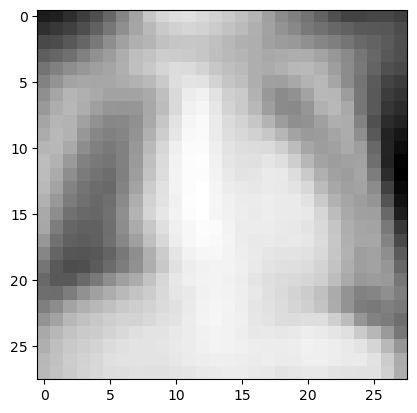

In [13]:
test_imgs_ = best_autoencoder.predict(test_imgs)
i=0

plt.imshow(test_imgs.iloc[i].values.reshape([28,28]), cmap='gray')
plt.show()
plt.imshow(test_imgs_[i].reshape([28,28]), cmap='gray')
plt.show()

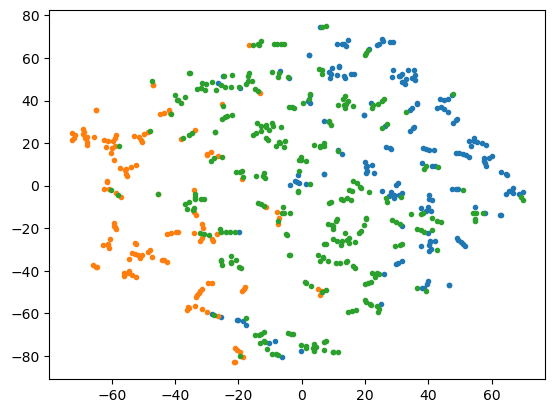

In [14]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(representation_test)

for i in range (max(groups)+1):
  plt.plot(X_embedded[groups == i,0], X_embedded[groups == i,1], '.')

## **4. Aplicación del modelo**
---

Una vez que haya entrenado y evaluado su modelo, es importante considerar cómo puede ser utilizado en un entorno práctico.

Intente analizar la capacidad del modelo para generalizar nuevos datos que no formaron parte del conjunto de entrenamiento o evaluación.

### Respuesta 1:

predicted: 0.0, 1


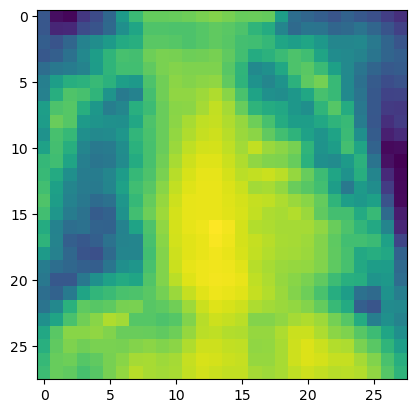

predicted: 0.0, 0


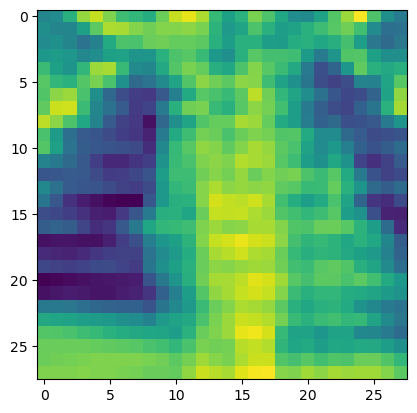

predicted: 0.0, 1


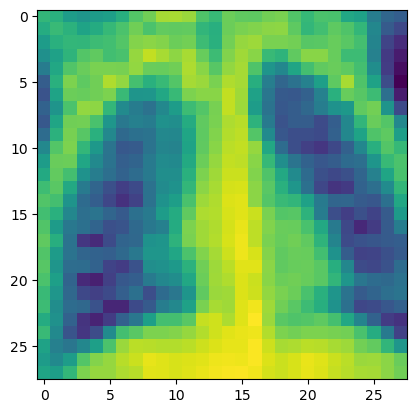

In [15]:
n=3
test_predict = best_classification_model.predict_proba(test_imgs.iloc[:n])
y_test_reduced = test_set.labels.flatten()[:n]

for j in range (n):
  print(f'predicted: {round(test_predict[j,0],2)}, {y_test_reduced[j]}')
  plt.imshow(test_imgs.iloc[j].values.reshape([28,28]))
  plt.show()

### Respuesta 2:

predicted: 2


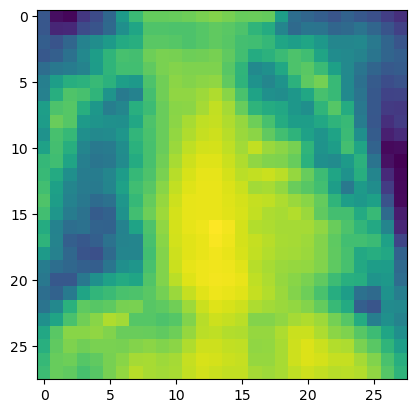

predicted: 0


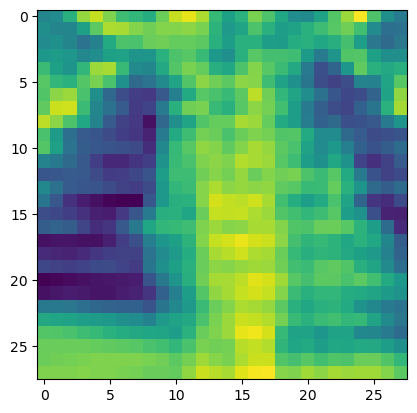

predicted: 2


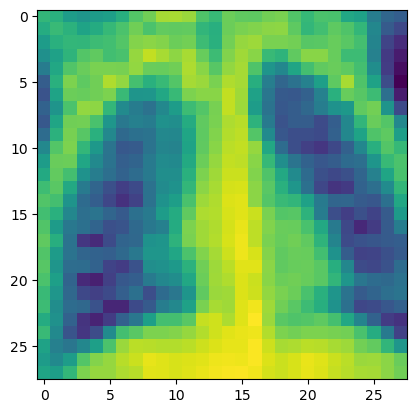

In [16]:
n=3
rp = activation((test_imgs.values@coefs) + interpects)
pred_cluster = best_clustering.predict(rp[:n])

for j in range (n):
  print(f'predicted: {pred_cluster[j]}')
  plt.imshow(test_imgs.iloc[j].values.reshape([28,28]))
  plt.show()

## **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistente docente :**
  * [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*